# SYRIATEL CUSTOMER CHURN PREDICTION PROJECT

**This project aims to build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem. The project entails data preprocessing, analysis, model selection, and evaluation to achieve accurate and actionable predictions. The stakeholders here are the telecom business itself, interested in reducing the amount of money lost because of customers who don't stick around very long.**

## BUSINESS OVERVIEW

This project addresses customer churn, a critical issue for SyriaTel, by building a predictive classifier to identify customers likely to leave. Using historical customer data, the project entails data preprocessing, exploratory analysis, feature engineering, and machine learning model development. The model's goal is to predict whether a customer will ("soon") stop doing business with SyriaTel, improve customer retention, and minimize revenue loss. Key challenges include handling data imbalance and evolving customer behavior. The outcomes aim to empower SyriaTel's decision-makers with data-driven strategies to target at-risk customers effectively.

##### PROBLEM STATEMENT:
SyriaTel faces significant revenue loss due to customer churn but lacks a data-driven approach to proactively identify at-risk customers. This project aims to develop a machine learning model to predict churn, uncover contributing factors, and provide actionable insights for targeted retention strategies, helping the company minimize churn and enhance customer loyalty.

##### OBJECTIVES
- Develop a machine learning classifier to accurately predict customer churn for SyriaTel, categorizing customers as "churn" or "non-churn."
- Identify key factors driving churn to provide actionable insights for targeted retention strategies.
- Utilize logistic regression for probabilistic predictions and feature interpretability.
- Leverage decision trees for capturing nonlinear patterns and generating intuitive decision rules.
- Evaluate model performance using precision, recall, F1-score, and AUC-ROC to ensure reliable predictions.
- Support SyriaTel in deploying data-driven strategies to minimize churn and improve customer loyalty.


##### METRICS OF SUCCESS
To evaluate and compare the performance of the logistic regression and decision tree models, the following metrics will be used:
- Precision: Measures the accuracy of predicting churn among all predicted churners, ensuring minimal false positives.
- Recall (Sensitivity): Captures the ability to identify all actual churners, minimizing false negatives.
- F1-Score: Balances precision and recall, providing a single metric for performance on imbalanced data.
- AUC-ROC: Assesses the model’s ability to distinguish between churners and non-churners across all thresholds.
These metrics ensure the chosen model performs well on the dataset, balances key trade-offs, and generalizes effectively to unseen data

## DATA UNDERSTANDING

This section explores the dataset's source, structure, and contents to ensure its relevance and credibility. We will examine the columns and rows to understand the variables and their significance for predicting customer churn.

##### DATA SOURCE:
The dataset used in this project is sourced from Kaggle, titled "Churn in Telecoms." It's a  csv file that contains information on customer demographics, service usage, and other features to predict telecom churn. The data is designed to help understand customer behaviors and improve retention strategies in the telecom industry. You can access it [here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

#### UNDERSTANDING ROWS & COLUMNS IN THE DATASET

In [1]:
#Import the libraries needed for this section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#LOAD THE DATASET
df = pd.read_csv('bigml.csv.csv')
df.shape

(3333, 21)

The dataset has 3333 rows (entries) and 21 columns

In [3]:
#MORE INFO ABOUT THE DATASET
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset consists of 3,333 customer records and 21 columns, including features like customer demographics, service usage, call minutes, charges, and interactions with customer service. The key column is **churn**, which indicates whether a customer has stopped using the service. The data is complete with no missing values (we'll confirm this later), providing a solid foundation for analyzing customer behavior and predicting churn based on usage patterns and other factors. Overall, this looks like a high quality dataset. 

The data types for this dataset are mainly numerical(int64 & float64) with a few categorical datatypes(object).

Our target column's datatype is a boolean, showing whether a customer has churned (True) or not (False)

In [4]:
#let's view the dataset briefly
df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


## DATA PREPARATION & ANALYSIS (EDA)

In [5]:
#THIS BIT IS TECHNICAL ENSURE CODE IS USED HERE AND NOT ALOT OF EXPLAINING (explanation can be done in the report)
#STEPS TAKEN TO PREP DATA, CLEANING, MISSING VALUES?
# UNIVARIATE, BI, & MULTIVARIATE ANALYSIS
#DISCUSS WHAT TO CHECK ON THE DATA (missing, duplicates(remove), outliers, nulls)
#DISCUSS HOW TO DEAL WITH THEM
#WHAT ARE THE % OF THE MISSING VALUES, DUPLICATES ETC.
#IS IMPUTATION, DROPPING, FORWARD/BACKFILL THE OPTION TO USE

In [6]:
# check for missing values in the dataset
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Our dataset doesn't have any missing values, which is great!

In [7]:
#check for duplicates
df.duplicated().sum()

0

This dataset has no duplicates.

In [8]:
#check if our dataset is imbalanced
#check our target column
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

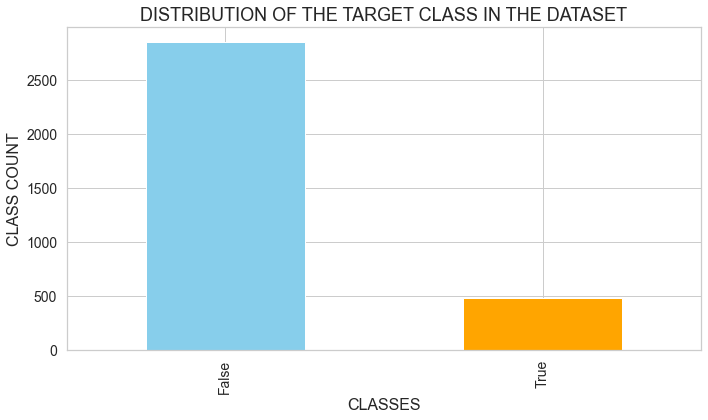

In [9]:
#let's visualize this imbalance
# Set a Seaborn style for the plot
sns.set_theme(style="whitegrid")

#Create the figure and set the size
plt.figure(figsize=(10, 6))

#Plot the value counts of the 'churn' column on a bar chart
df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('CLASSES', fontsize=16)
plt.ylabel('CLASS COUNT', fontsize=16)
plt.title('DISTRIBUTION OF THE TARGET CLASS IN THE DATASET', fontsize=18)

# Increase font size for ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

There's a substantial imbalance in our dataset. 85.5% of the rows belong to the "False" class while 14.49% of rows belong to the "True" class.

In [10]:
#let's check which area codes are heavily served by SyriaTel
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Let's convert the data type of the area code column from integer to categorical, as it serves as an identifier (similar to a phone number) rather than a numerical value.

In [11]:
#change the dtype of the area code from int to categorical as its an identifier
df['area code'] = df['area code'].astype(object)

In [12]:
#confirm the change
print(df['area code'].dtypes)

object


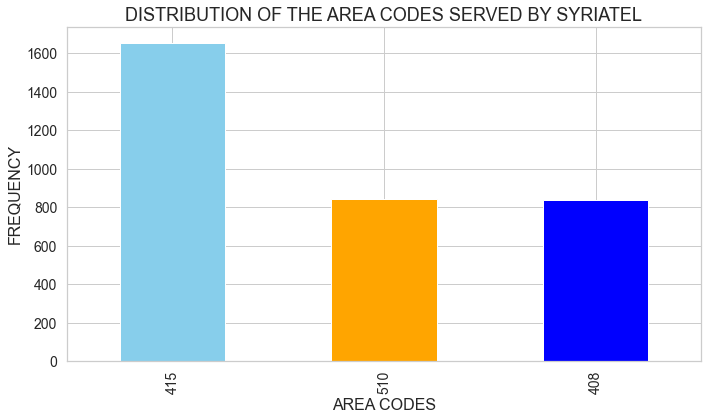

In [13]:
#let's visualize these area codes

# Set a Seaborn style for the plot
sns.set_theme(style="whitegrid")

#Create the figure and set the size
plt.figure(figsize=(10, 6))

#Plot the value counts of the 'churn' column on a bar chart
df['area code'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'blue'])

# Add labels and title
plt.xlabel('AREA CODES', fontsize=16)
plt.ylabel('FREQUENCY', fontsize=16)
plt.title('DISTRIBUTION OF THE AREA CODES SERVED BY SYRIATEL', fontsize=18)

# Increase font size for ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Aggregate churn counts by state
state_churn = df.groupby('state')['churn'].value_counts().unstack(fill_value=0)

# Display the result
print(state_churn)

churn  False  True 
state              
AK        49      3
AL        72      8
AR        44     11
AZ        60      4
CA        25      9
CO        57      9
CT        62     12
DC        49      5
DE        52      9
FL        55      8
GA        46      8
HI        50      3
IA        41      3
ID        64      9
IL        53      5
IN        62      9
KS        57     13
KY        51      8
LA        47      4
MA        54     11
MD        53     17
ME        49     13
MI        57     16
MN        69     15
MO        56      7
MS        51     14
MT        54     14
NC        57     11
ND        56      6
NE        56      5
NH        47      9
NJ        50     18
NM        56      6
NV        52     14
NY        68     15
OH        68     10
OK        52      9
OR        67     11
PA        37      8
RI        59      6
SC        46     14
SD        52      8
TN        48      5
TX        54     18
UT        62     10
VA        72      5
VT        65      8
WA        52     14


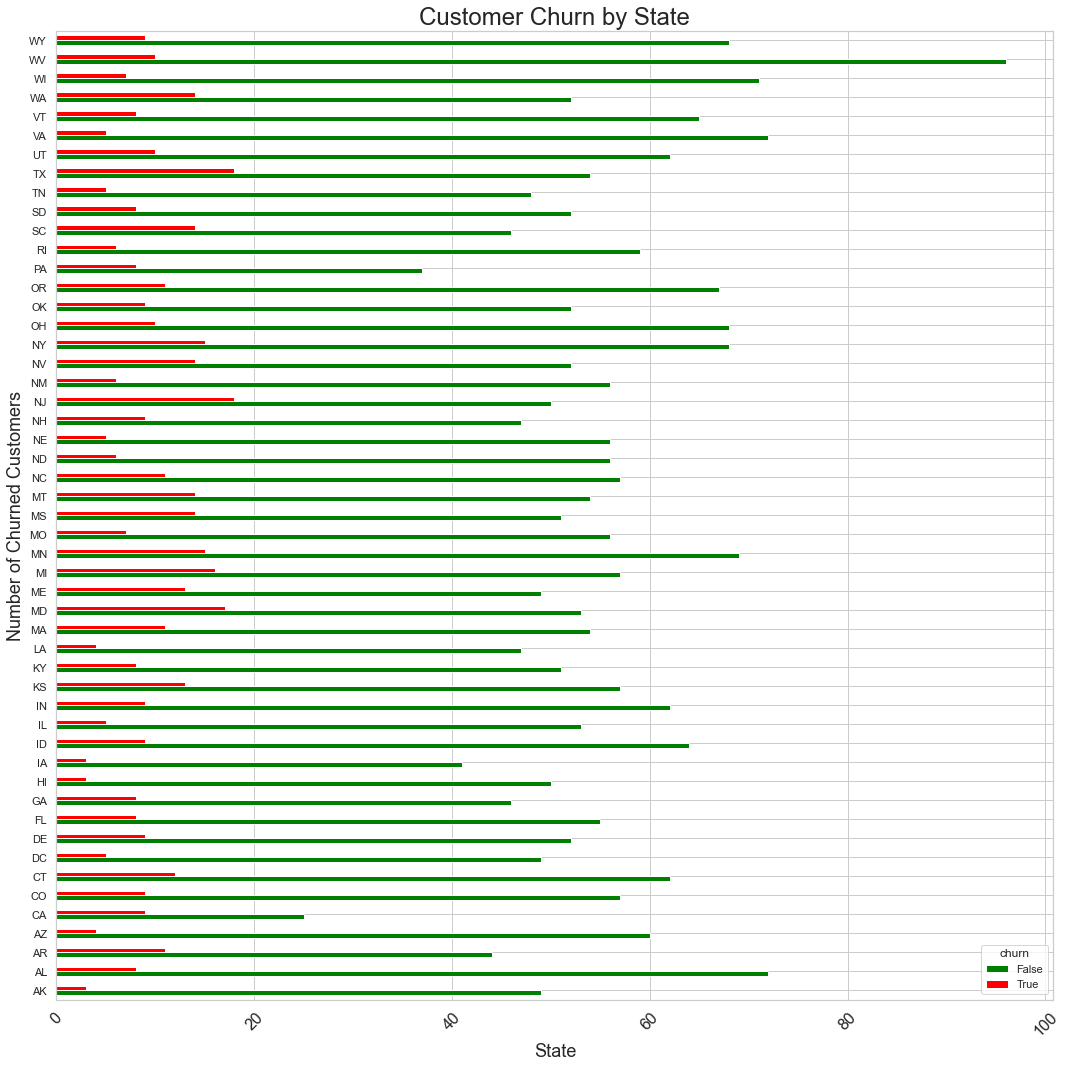

In [15]:
#customer churn by "state"

# Create the bar plot
plt.figure(figsize=(15, 15))
state_churn.plot(kind='barh', stacked=False, ax=plt.gca(), color=['green', 'red'])

# Customize the plot
plt.xlabel('State', fontsize=18)
plt.ylabel('Number of Churned Customers', fontsize=18)
plt.title('Customer Churn by State', fontsize=24)
plt.xticks(rotation=45, fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
#state with the highest churn. top 20
highest_churn_state = df[df['churn'] == True].groupby('state').size().sort_values(ascending=False).head(20)

highest_churn_state

state
TX    18
NJ    18
MD    17
MI    16
NY    15
MN    15
MS    14
MT    14
WA    14
SC    14
NV    14
ME    13
KS    13
CT    12
NC    11
MA    11
OR    11
AR    11
OH    10
UT    10
dtype: int64

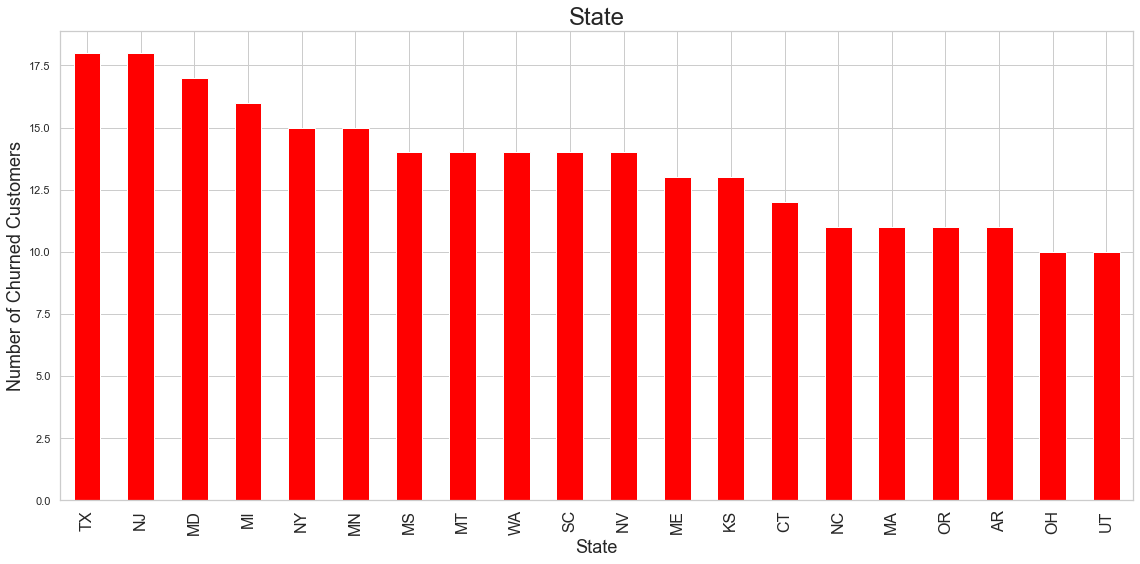

In [17]:
# Create the bar plot
plt.figure(figsize=(16, 8))
highest_churn_state.plot(kind='bar', color=['red'])

# Customize the plot
plt.xlabel('State', fontsize=18)
plt.ylabel('Number of Churned Customers', fontsize=18)
plt.title('State', fontsize=24)
plt.xticks(rotation=90, fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
#states with the highest customer service calls
highest_service_calls= df.groupby('state')['customer service calls'].sum().sort_values(ascending=False).head(20)

highest_service_calls

state
WV    159
NY    142
OR    135
MN    130
VT    127
AL    125
VA    123
ID    122
IN    120
MD    119
MI    119
CO    118
TX    116
NJ    114
CT    112
WY    111
WI    111
MT    111
MS    110
AR    109
Name: customer service calls, dtype: int64

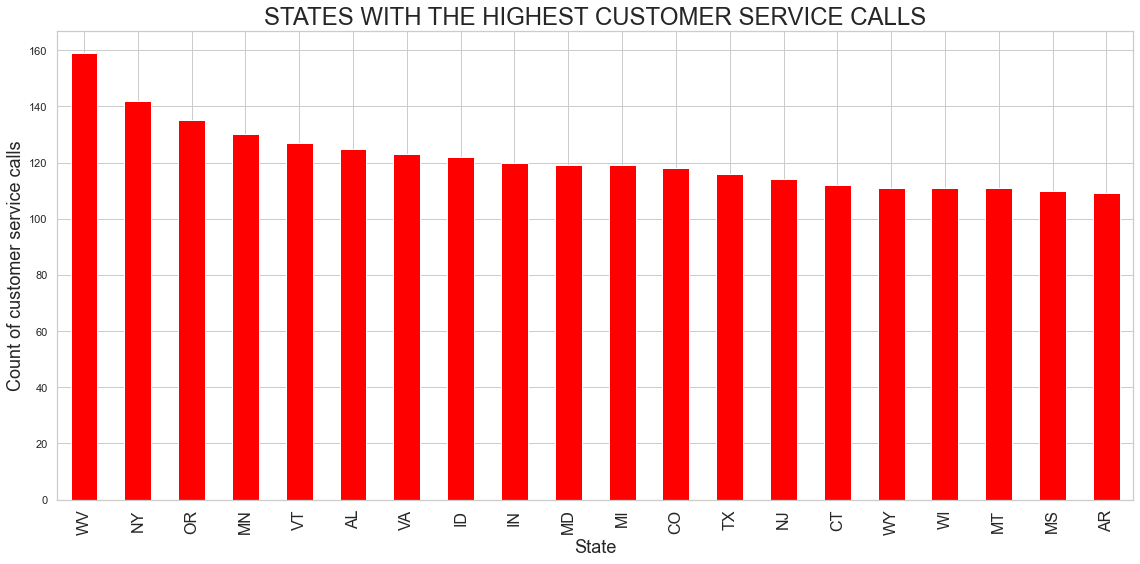

In [19]:
# Create the bar plot
plt.figure(figsize=(16, 8))
highest_service_calls.plot(kind='bar', color=['red'])

# Customize the plot
plt.xlabel('State', fontsize=18)
plt.ylabel('Count of customer service calls', fontsize=18)
plt.title('STATES WITH THE HIGHEST CUSTOMER SERVICE CALLS', fontsize=24)
plt.xticks(rotation=90, fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Find the common states (intersection) between the two
common_states = highest_churn_state.index.intersection(highest_service_calls.index)
common_states

Index(['TX', 'NJ', 'MD', 'MI', 'NY', 'MN', 'MS', 'MT', 'CT', 'OR', 'AR'], dtype='object', name='state')

In [21]:
#what times do people mostly use the services
# Summing up the calls for each type
calls_summary = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']].sum()

# Display the summary of calls
print(calls_summary)

total day calls      334752
total eve calls      333681
total night calls    333659
total intl calls      14930
dtype: int64


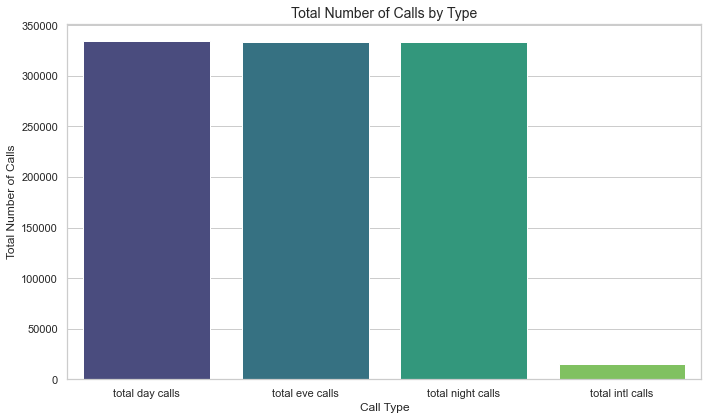

In [22]:
# Create a bar plot to visualize the total number of calls by type
plt.figure(figsize=(10, 6))
sns.barplot(x=calls_summary.index, y=calls_summary.values, palette='viridis')

# Customize the plot
plt.xlabel('Call Type', fontsize=12)
plt.ylabel('Total Number of Calls', fontsize=12)
plt.title('Total Number of Calls by Type', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [24]:
#churn rate by plan (intl plan, vm plan, area code)
#how long do people use the services before churning?
#summarize findings and identify features that seem most correlated with churn.
#what are the key variables? and show their visual distribution

## DATA PREPARATION FOR MODELING

In [25]:
#encoding columns 
#dealing with imbalance
#check if to Normalize/standardize numerical features, especially if needed for Logistic Regression
#any feature engineering?
#examine correlations
#check how to Investigate potential patterns in customer behavior related to churn.

## MODELING

In [26]:
# MENTION THE MODELS PICKED (logistic reg + dt), then compare performance
# HAVE 3 MODELS (baseline, and 2nd and 3rd hyperparameter tuned models)
# CLASSIFICATION MODEL (LOGISTIC REG/DECISION TREE)
#ENSURE TO INCLUDE PREDICTIVE APPROACH IN ADDITION TO INFERENTIAL
#MENTION PREDICTIVE FINDINGS & RECOMMENDATIONS
#ITERATIVE APPROACH TO MODELING (build multiple models...check project desc)

In [27]:
# JUSTIFY REASONS FOR SELECTING THE MODEL

In [28]:
# REFER TO THE METRICS OF SUCCESS MENTIONED EARLIER

## MODEL EVALUATION

In [29]:
#RANK MODELS ACCORDING TO METRICS DISCUSSED EARLIER
#DISCUSS EACH MODEL AND ITS PERFORMANCE. MENTION THE BEST PERFORMER AND WHY

## MODELS COMPARISON

## RECOMMENDATIONS

In [30]:
#POINT FORM (discussion in paragraphs will be in the report)
#PREDICTIVE FINDINGS & PREDICTIVE RECOMMENDATIONS
#GIVE SUGGESTIONS BASED ON FINDNGS (ANALYSIS & MODELING)
#GIVE SUGGESTION BASED ON CHALLENGES FACED (e.g we need to collect more data, check locations etc)

## CONCLUSION

In [31]:
# Brief (more explanation in the data report)
#WHAT ARE YOUR FINDINGS FROM THE ANALYSIS & MODELING?
#ANSWERS EVERYTHING IN YOUR OBJECTIVES

## NEXT STEPS

In [32]:
# POINT-FORM, BRIEF (more discussion in the report)
#DISCUSS DEPLOYMENT OF THE MODEL FOR ACCESS TO END USERS
# COLLECT MORE DATA POINTS